## EDA ANZ Data

Tasks: 
* This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.
- The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.
- Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?
- Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?
- Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.
- For a challenge – what insights can you draw from the location information provided in the dataset?
- Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [152]:
# Importing libraries: 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score


In [153]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [154]:
df.head() 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [155]:
# shape of the data: 
df.shape
# Rows, Columns. 

(12043, 23)

In [156]:
# Pandas profiling: 
!pip install pandas-profiling
import pandas_profiling as pp 

In [157]:
pp.ProfileReport(df)

## Dataset Information: 
- card_present_flag means: if the transaction was done using card. 1 for yes, 0 for no. 
- bpay_biller_code: Biller Codes are required to process BPay transaction and is used to identify the where the money is being sent.
- merchant_id: Id of the Merchant
- merchant_code: Code of the merchant
- merchant_suburb: Suburb of the merchant
- merchant_state: State of the Merchant - NSW, Vic, QLD, West. AUS, South. Aus, Northern Territory, Australian Capital Territory and Tasmania and Australian
- merchant_long_lat: Longitude and Latitude. 
- currency: Currency
- country: Country
- account: Account number. 
- long_lat: Coordinates.
- first_name: First name of Customer
- extraction: Date time data of the point of transaction
- customer_id: Unique custmer ID 
- txn_description: Type of Transaction
- status: Authorized or posted; Pending transactions are authorized transactions, and a hold is placed on your card for the purchase amount. Posted transactions are purchases that have cleared on your card and the funds have been deducted
- gender: Gender 
- movement: Debit or Credit card. 
- transaction_id: ID of the Transaction. 

### Missing Values: 

- card_present_flag has 4326 (35.9%) missing values	
- bpay_biller_code has 11158 (92.7%) missing values
- merchant_id has 4326 (35.9%) missing 
- merchant_code has 11160 (92.7%) missing values
- merchant_suburb has 4326 (35.9%) missing values	
- merchant_state has 4326 (35.9%) missing values	
- merchant_long_lat has 4326 (35.9%)  Missing values 

### Data Types

In [158]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

- merchant_code to be converted to Object as they are nominal values. 
- Time can be extracted from extraction column. 


In [159]:
df['merchant_code'] = df['merchant_code'].astype(object)

In [160]:
df['extraction'] = df['extraction'].astype('datetime64[ns]')

In [161]:
from datetime import datetime
df['extraction_time'] = df.extraction.dt.strftime('%H:%M:%S')

In [162]:
df['month'] = df.date.apply(lambda x: x.month_name())

In [163]:
df['day'] = df.date.apply(lambda x: x.day_name())

In [164]:
df['day_year'] = df.date.dt.dayofyear
df['week_year'] = df.date.dt.week
# df['Week_Number'] = df['Date'].dt.week


In [165]:
# df= df.drop(['day'],axis = 1)

In [166]:
# df.card_present_flag = df.card_present_flag.fillna('float64')

In [167]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [168]:

df.card_present_flag = df.card_present_flag.astype('float64')

In [169]:
df.head() 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,month,day,day_year,week_year
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,August,Wednesday,213,31
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,August,Wednesday,213,31
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,August,Wednesday,213,31
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,August,Wednesday,213,31
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,August,Wednesday,213,31


In [170]:
df['card_present_flag'].fillna(value = df.card_present_flag.median(), inplace=True)

In [171]:
df['merchant_id'].fillna('Missing',inplace = True)

In [172]:
df['merchant_code'].fillna('Missing',inplace = True)

In [173]:
df['merchant_long_lat'].fillna('Unknown',inplace = True)

In [174]:
df['merchant_state'].fillna('Missing',inplace =True) 

In [175]:
df['bpay_biller_code'].fillna(value = 'Unknown', inplace=True)

In [176]:
df.to_csv('Tableau_ANZ.csv')

In [177]:
df.head() 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,month,day,day_year,week_year
0,authorized,1.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Missing,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,August,Wednesday,213,31
1,authorized,0.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Missing,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,August,Wednesday,213,31
2,authorized,1.0,Unknown,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Missing,Michael,...,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,August,Wednesday,213,31
3,authorized,1.0,Unknown,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Missing,Rhonda,...,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,August,Wednesday,213,31
4,authorized,1.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Missing,Diana,...,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,August,Wednesday,213,31


## Univariate categorical analysis: 

In [178]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 20)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

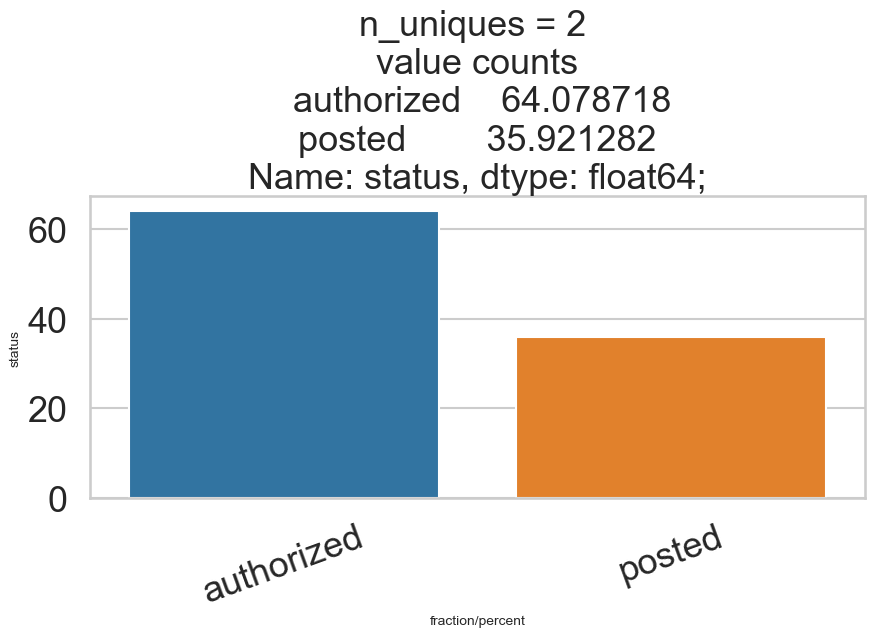

In [179]:
UVA_category(df, ['status'])

- Pending transactions are **authorized** transactions, and a hold is placed on your card for the purchase amount. Majority of the transactions are placed on hold on their cards.
- **Posted** transactions are purchases that have cleared on your card and the funds have been deducted. Less than 40%. 


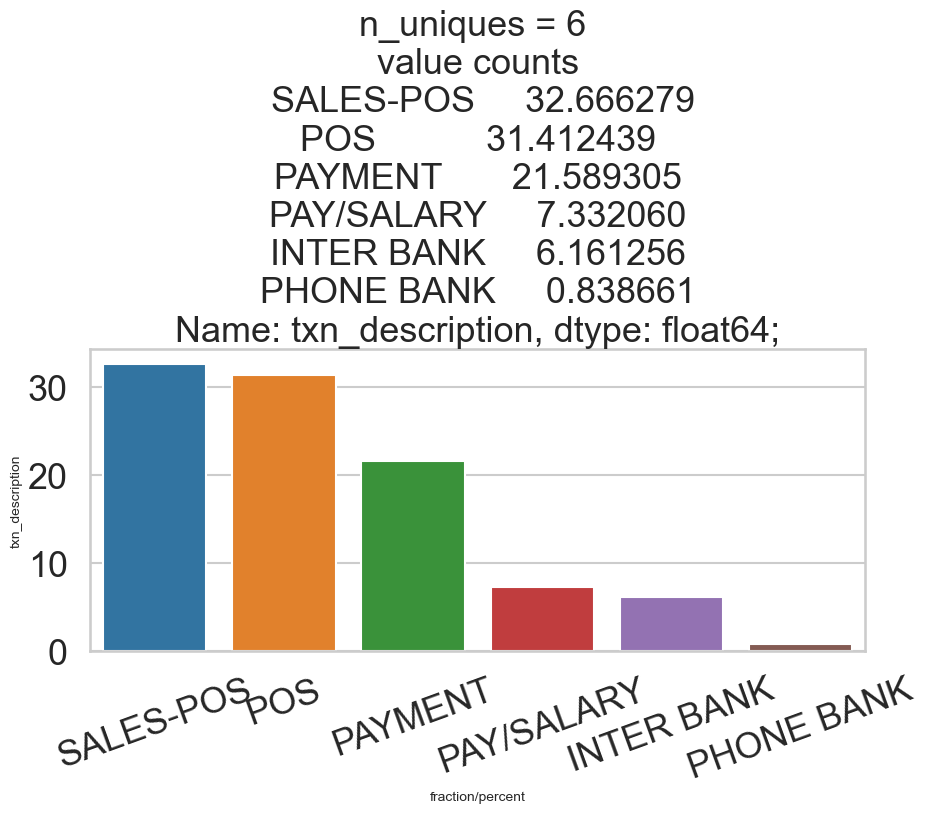

In [180]:
UVA_category(df, ['txn_description'])

- about 65% of the transactions are accounted by Sales-pos and Pos. Phone banking is the least

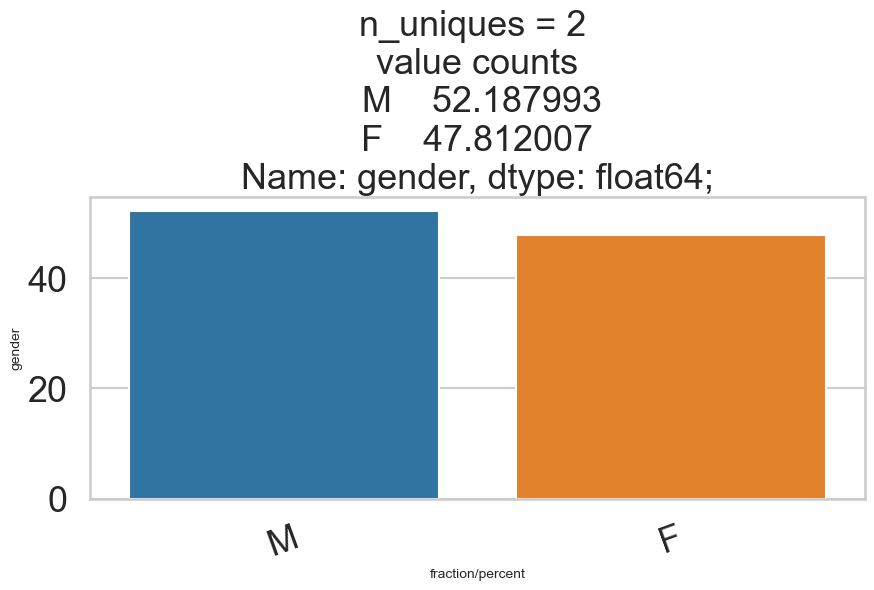

In [181]:
UVA_category(df, ['gender'])

Males have performed more txns than females. 

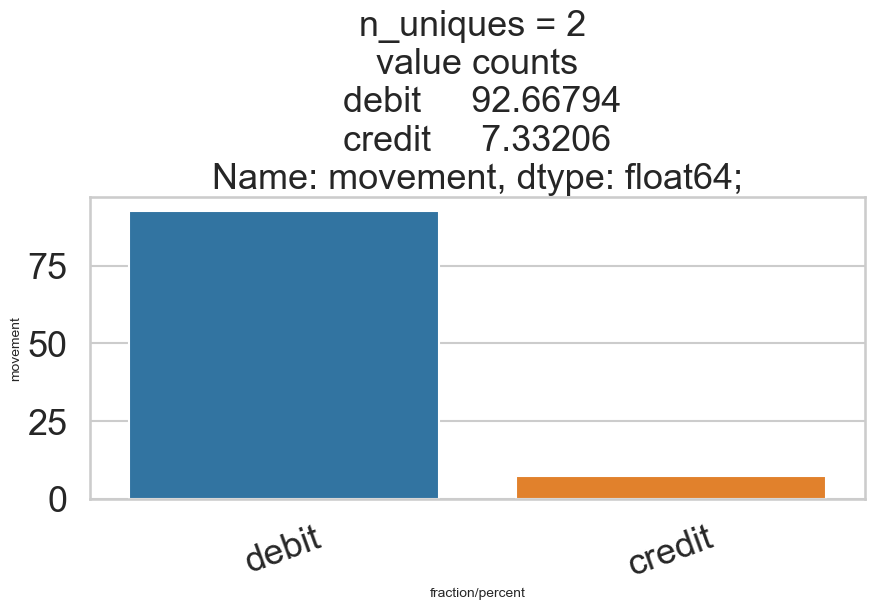

In [182]:
UVA_category(df, ['movement'])

About 92% of the transaction have been done using debit card. 

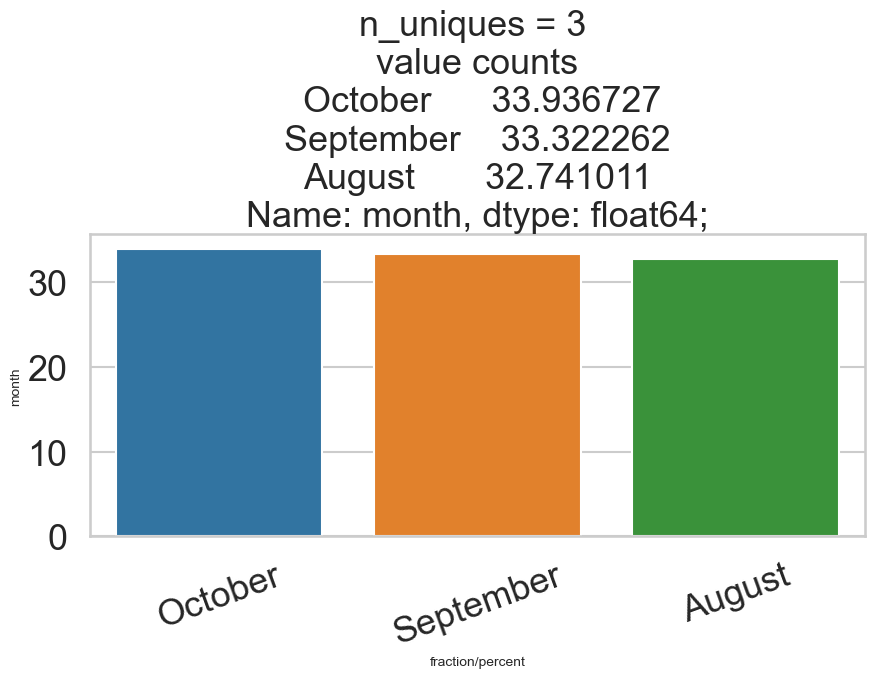

In [183]:
UVA_category(df, ['month'])

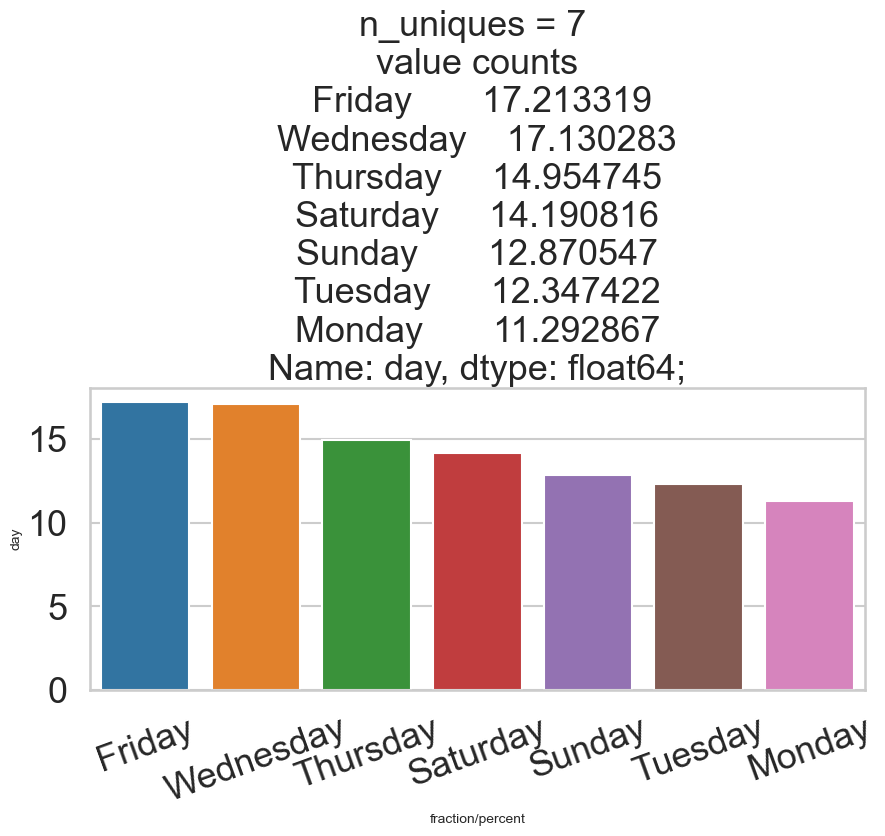

In [184]:
UVA_category(df, ['day'])

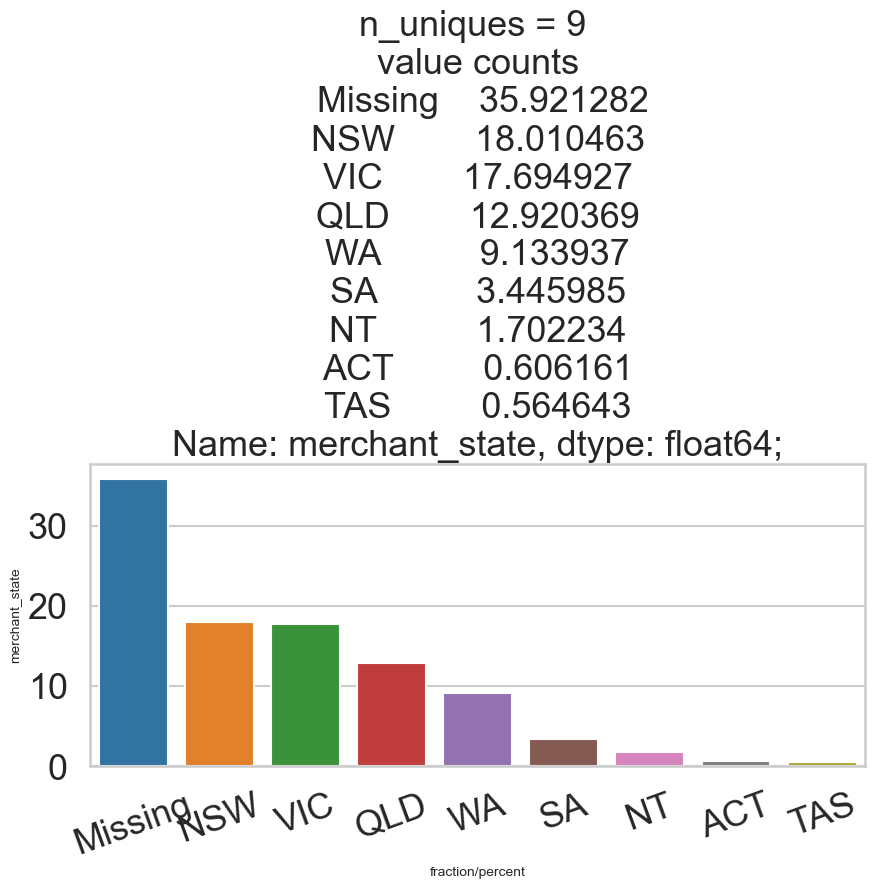

In [185]:
UVA_category(df, ['merchant_state'])

Most of the transactions have been done on friday and the least on a monday. 

## Univariate analysis of numerical values:

In [186]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std()
     

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.distplot(data[i], kde=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; std = {}; range = {}\nmean = {}; median = {})'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

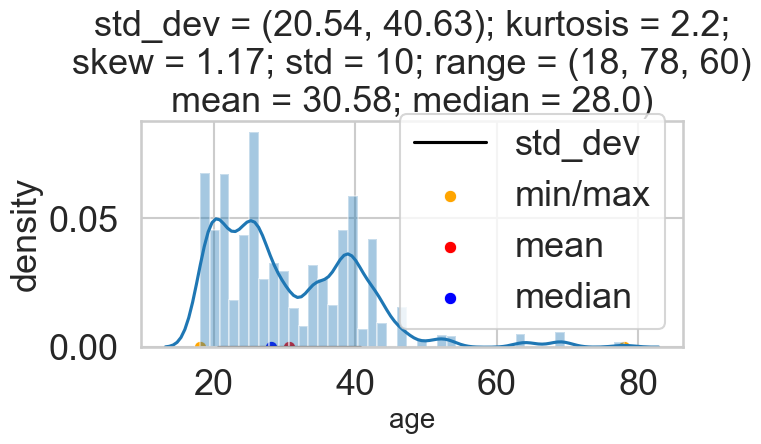

In [187]:
UVA_numeric(df, ['age'])

- Its right skewed distribution. Mean is greater than the median and positive skew value. 
- the age of the youngest customer is 20 and eldest is 78 years. 
- Std. deviation is much lesser than mean, which means the data is clustered around it. 
- Kurtosis tells its a Leptokurtic distribution. And has extreme values. 

- The data is not normally distributed. 
- The age is biased towards younger and middle age. 

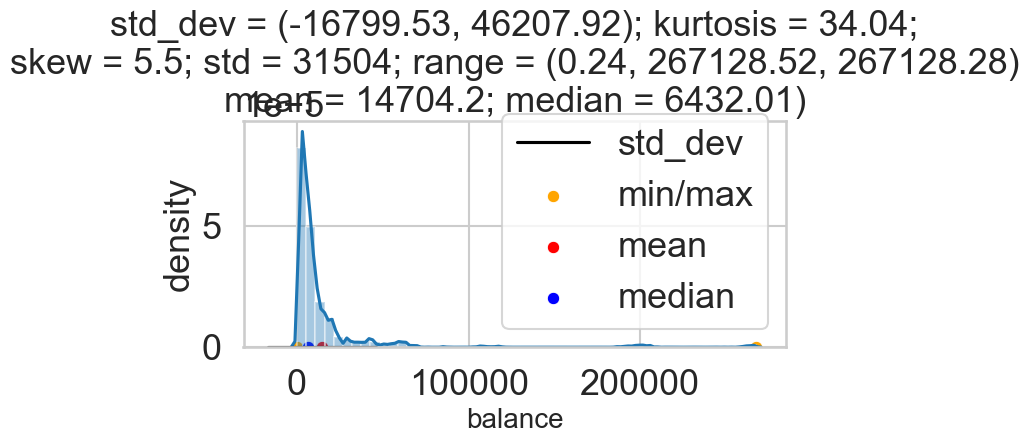

In [188]:
UVA_numeric(df, ['balance'])

- Its highly right skewed data. Median is lesser than the mean 
- kurtosis is extremely high indicating that there is too extreme values present. 
- Balance ranges from having 0.24AUD to 267128 AUD. 
- Standard deviation is highly greater than the mean which means the data is nt clustered around the mean. 
- Mean is not equal to median, not symmertical.
- The distribution is biased towards having lower balance. 

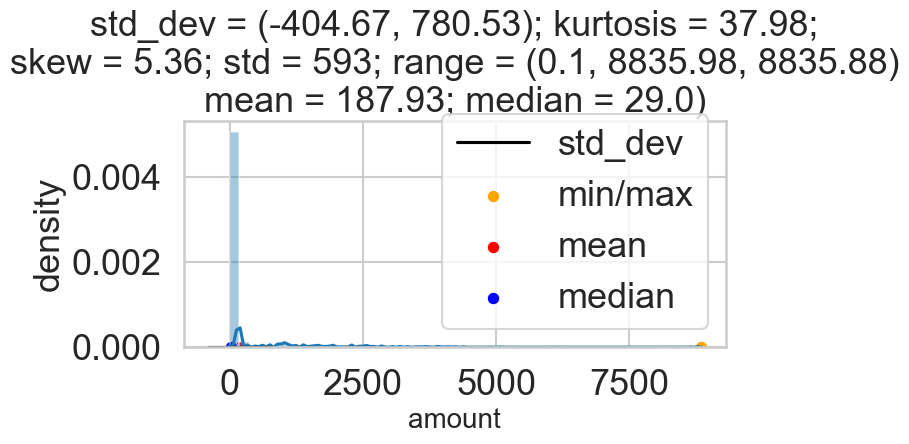

In [189]:
UVA_numeric(df, ['amount'])

- Median is lesser than the mean hence its a right skewed distribution. 
- transaction amount varies from 0.10AUD to 8835 AUD. 
- The dist is not symmetric. 
- We can see its biased by lower value transactions. 
- Std dev is higher than the mean which means the data is not distributed around the mean. 

# Task 2 
To predict the Annual salary of the customers 

In [190]:
df.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,month,day,day_year,week_year
0,authorized,1.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Missing,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,August,Wednesday,213,31
1,authorized,0.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Missing,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,August,Wednesday,213,31


In [191]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,balance,age,amount,day_year,week_year
customer_id,,,,,,
CUS-1005756958,1.0,4718.665385,53.0,970.47,261.0,38.0
CUS-1117979751,1.0,11957.202857,21.0,3578.65,260.0,38.0
CUS-1140341822,1.0,5841.720000,28.0,1916.51,257.0,37.0
CUS-1147642491,1.0,8813.467692,34.0,1711.39,260.0,38.0
CUS-1196156254,1.0,23845.717143,34.0,3903.73,255.0,37.0


In [198]:
salaries = [] 
for i in df['customer_id']: 
    salaries.append(int(df_salaries.loc[i]['amount']))
df['salary'] = 

In [41]:

salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries 

In [42]:
df['annual_salary'] = df['annual_salary'] * 12

In [43]:
df.head(20) 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,country,customer_id,merchant_long_lat,movement,extraction_time,month,day,day_year,week_year,annual_salary
0,authorized,1.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Missing,Diana,...,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,August,Wednesday,213,31,12156
1,authorized,0.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Missing,Diana,...,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,August,Wednesday,213,31,12156
2,authorized,1.0,Unknown,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Missing,Michael,...,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,August,Wednesday,213,31,12024
3,authorized,1.0,Unknown,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Missing,Rhonda,...,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,August,Wednesday,213,31,10704
4,authorized,1.0,Unknown,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Missing,Diana,...,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,August,Wednesday,213,31,12156
5,posted,1.0,Unknown,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,Missing,Missing,Robert,...,Australia,CUS-2688605418,Unknown,debit,02:00:00,August,Wednesday,213,31,27840
6,authorized,1.0,Unknown,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,Missing,Kristin,...,Australia,CUS-4123612273,144.95 -37.53,debit,02:23:04,August,Wednesday,213,31,12816
7,authorized,1.0,Unknown,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,Missing,Kristin,...,Australia,CUS-4123612273,144.96 -37.81,debit,04:11:25,August,Wednesday,213,31,12816
8,authorized,1.0,Unknown,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,Missing,Tonya,...,Australia,CUS-3026014945,115.85 -31.9,debit,04:40:00,August,Wednesday,213,31,34080
9,posted,1.0,Unknown,ACC-602667573,AUD,151.23 -33.96,INTER BANK,Missing,Missing,Michael,...,Australia,CUS-2031327464,Unknown,debit,06:00:00,August,Wednesday,213,31,27360


In [44]:
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,balance,age,amount,day_year,week_year,annual_salary
customer_id,,,,,,,
CUS-1005756958,0.876712,2275.852055,53.0,222.862603,240.547945,34.808219,11640.0
CUS-1117979751,0.910000,9829.929000,21.0,339.843700,256.940000,37.160000,42936.0
CUS-1140341822,0.850000,5699.212250,28.0,212.632500,270.500000,39.025000,22992.0
CUS-1147642491,0.838983,9032.841186,34.0,245.600169,265.881356,38.466102,20532.0
CUS-1196156254,0.857143,22272.433755,34.0,147.145796,256.640816,37.069388,46836.0


In [45]:
sal = df_cus.copy() 

In [46]:
sal.columns

Index(['card_present_flag', 'balance', 'age', 'amount', 'day_year',
       'week_year', 'annual_salary'],
      dtype='object')

In [47]:
sal.shape

(100, 7)

In [48]:
        sal = df[["txn_description", "gender", "age", "merchant_state", "movement", "annual_salary", 'balance','amount','week_year','card_present_flag','day_year']]


In [49]:
sal.head() 

,txn_description,gender,age,merchant_state,movement,annual_salary,balance,amount,week_year,card_present_flag,day_year
0,POS,F,26,QLD,debit,12156,35.39,16.25,31,1.0,213
1,SALES-POS,F,26,NSW,debit,12156,21.20,14.19,31,0.0,213
2,POS,M,38,NSW,debit,12024,5.71,6.42,31,1.0,213
3,SALES-POS,F,40,QLD,debit,10704,2117.22,40.90,31,1.0,213
4,SALES-POS,F,26,QLD,debit,12156,17.95,3.25,31,1.0,213


In [50]:
sal_dummy = pd.get_dummies(sal)

In [51]:
sal_dummy.head()

,age,annual_salary,balance,amount,week_year,card_present_flag,day_year,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,...,merchant_state_Missing,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,12156,35.39,16.25,31,1.0,213,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,26,12156,21.20,14.19,31,0.0,213,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,38,12024,5.71,6.42,31,1.0,213,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,40,10704,2117.22,40.90,31,1.0,213,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,26,12156,17.95,3.25,31,1.0,213,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Simple linear regression 

In [52]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [53]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

### Segregating variables: Independent and Dependent Variables

In [54]:
#seperating independent and dependent variables
y = sal_dummy['annual_salary']
x = sal_dummy.drop(['annual_salary'], axis=1)

In [55]:
y.shape, x.shape

((12043,), (12043, 25))

### Splitting the data into train set and the test set

In [56]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

### Implementing Linear Regression

In [57]:
#creating the train and validation set
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 101, test_size=0.25)

In [58]:
#shape of training set
train_x.shape, train_y.shape

((9032, 25), (9032,))

In [59]:
#shape of validation set
test_x.shape, test_y.shape

((3011, 25), (3011,))

### Implementing Linear Regression

In [60]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [61]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 11421.465431405211


In [62]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     11341.65081121078


In [63]:
# r square: 
np.sqrt(metrics.mean_squared_error(test_predict, test_y))

15408.335652233756

In [64]:
lr.score(train_x, train_y)

0.16632807271742112

In [65]:
lr.predict(test_x)

array([25064.15315971, 19218.37641268, 29355.71251362, ...,
       30288.73582416, 29082.33893719, 21232.22830983])

In [66]:
lr.score(test_x, test_y)

0.1849549897118159

In [67]:
r2_score(test_y, test_predict)

0.1849549897118159

### Parameters of Linear Regression

In [68]:
lr.coef_

array([-2.08904627e+02,  1.33565831e-01,  8.32137847e+00,  3.86215108e+02,
       -4.78983888e+02, -6.66816680e+01,  3.64290416e+03, -6.90084055e+03,
        8.25448472e+02,  1.08653267e+03,  6.33205829e+02,  7.12749418e+02,
       -2.83928041e+03,  2.83928041e+03,  3.03659325e+03, -1.34595525e+03,
       -3.46719707e+03,  6.88654506e+03, -4.12130702e+03,  7.64991557e+02,
        5.87696258e+03, -5.27614339e+03, -2.35448973e+03, -6.90084055e+03,
        6.90084055e+03])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

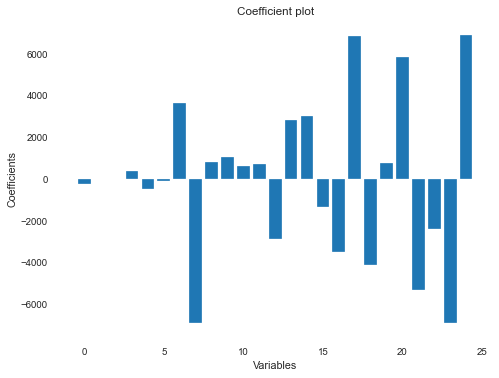

In [69]:
plt.figure(figsize=(8, 6), dpi=70, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumptions of Linear Model

In [70]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
6480,29316,25064.153160,4251.846840
7921,10704,19218.376413,-8514.376413
2791,36852,29355.712514,7496.287486
6019,11004,25904.807442,-14900.807442
9096,12156,21672.321040,-9516.321040


In [71]:
len(residuals)

3011

### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

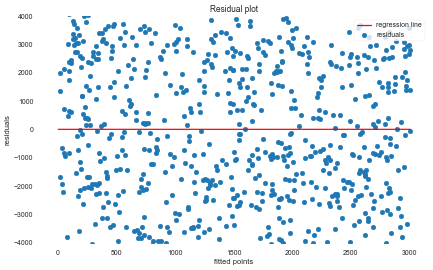

In [72]:
plt.figure(figsize=(10, 6), dpi=50, facecolor='w', edgecolor='b')
f = range(0,3011)
k = [0 for i in range(0,3011)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

### Checking Distribution of Residuals

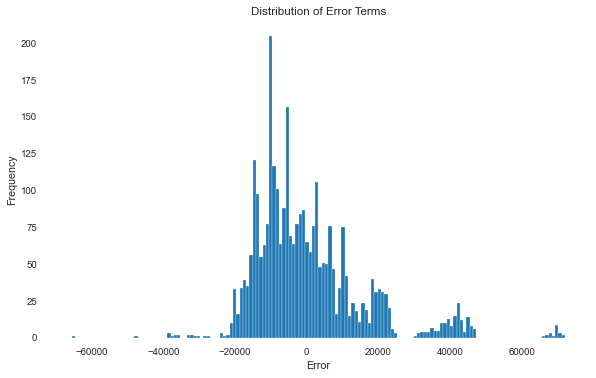

In [73]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=70, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

### QQ-Plot (Is the data Normally Distributed?)

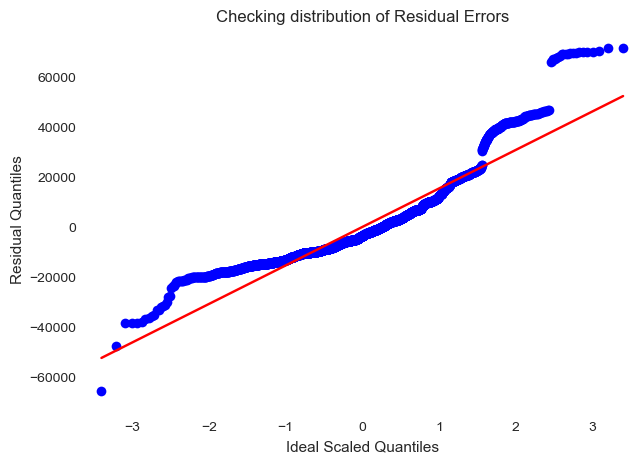

In [74]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(7,5) , dpi = 100)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [75]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(sal_dummy.values, i) for i in range(sal_dummy.shape[1])], index =sal_dummy.columns)
VIF

C:\Users\akilm\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


age                             1.084507
annual_salary                   1.206855
balance                         1.174965
amount                          3.073685
week_year                     202.843920
card_present_flag               1.089981
day_year                      202.808455
txn_description_INTER BANK           inf
txn_description_PAY/SALARY           inf
txn_description_PAYMENT              inf
txn_description_PHONE BANK           inf
txn_description_POS                  inf
txn_description_SALES-POS            inf
gender_F                             inf
gender_M                             inf
merchant_state_ACT                   inf
merchant_state_Missing               inf
merchant_state_NSW                   inf
merchant_state_NT                    inf
merchant_state_QLD                   inf
merchant_state_SA                    inf
merchant_state_TAS                   inf
merchant_state_VIC                   inf
merchant_state_WA                    inf
movement_credit 

From this list, we clearly see that there happens to be couple of Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables.

## Model Interpretability
So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [76]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [77]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 11411.395039858282


In [78]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     11325.760212553969


Text(0.5, 1.0, 'Normalized Coefficient plot')

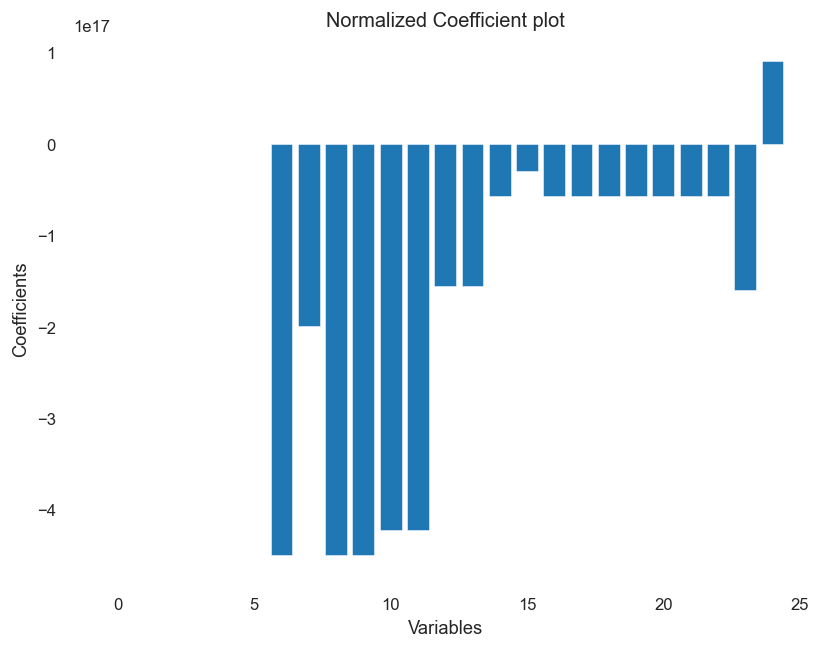

In [79]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

### Creating new subsets of data

In [80]:
#seperating independent and dependent variables
#seperating independent and dependent variables
X = sal_dummy.drop(['annual_salary'], axis=1)
y = sal_dummy['annual_salary']

### Arranging coefficients with features

In [81]:
Coefficients = pd.DataFrame({
    'Variable'    : X.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,age,-209.444905
1,balance,0.134265
2,amount,8.297304
3,week_year,355.100141
4,card_present_flag,-366.539040


### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [82]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

### Extracting the significant subset do independent Variables

In [83]:
subset = sal_dummy[sig_var['Variable'].values]
subset.head()

,amount,week_year,movement_debit
0,16.25,31,1
1,14.19,31,1
2,6.42,31,1
3,40.90,31,1
4,3.25,31,1


### Splitting the data into train set and the test set

In [84]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

### Implementing Linear Regression

In [85]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

### Training Model

In [86]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

### Predicting over the train set

In [87]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 12488.19898888662


### Predicting over the test set

In [88]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     12572.938696195268


In [89]:
np.sqrt(metrics.mean_squared_error(test_predict, test_y))

16377.591697972692

In [90]:
lr.score(train_x, train_y)

0.04911449408645541

# Decision Tree Regressor

In [91]:
#seperating independent and dependent variables
y = sal_dummy['annual_salary']
x = sal_dummy.drop(['annual_salary'], axis=1)

In [92]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [93]:
#creating the train and validation set
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 101, test_size=0.25)

In [94]:
#shape of training set
train_x.shape, train_y.shape

((9032, 25), (9032,))

In [95]:
#shape of validation set
test_x.shape, test_y.shape

((3011, 25), (3011,))

In [96]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [97]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [98]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [99]:
y_pred = dt_model.predict(test_x)

In [100]:
#checking the training score
dt_model.score(train_x, train_y)

1.0

In [101]:
#checking the validation score
dt_model.score(test_x, test_y)

0.8946228905120985

In [102]:
mse = mean_squared_error(test_y, y_pred)
rmse = mse**0.5
rmse

5540.361143895086

### Changing max depth

In [103]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(test_x, test_y))

In [104]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.sort_values('valid_acc', ascending = False)

,max_depth,train_acc,valid_acc
18,19,0.996061,0.898541
17,18,0.991144,0.898474
16,17,0.971829,0.882973
14,15,0.946817,0.876922
15,16,0.956569,0.875905
12,13,0.923152,0.867011
13,14,0.936166,0.864941
11,12,0.902699,0.855735
10,11,0.877484,0.843532
9,10,0.839396,0.816959


No handles with labels found to put in legend.


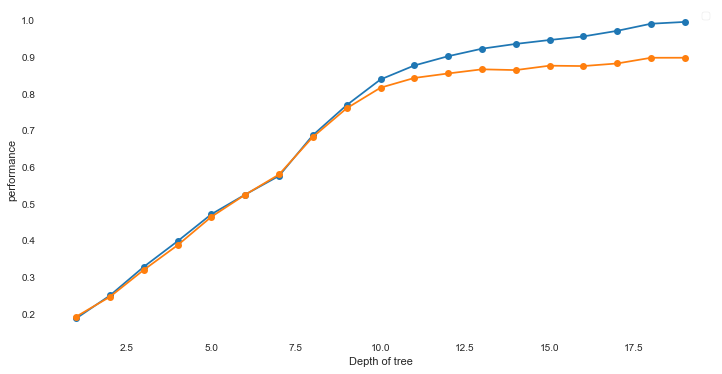

In [105]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [106]:
dt_model = DecisionTreeRegressor(max_depth=19,random_state=10)

In [107]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=19, random_state=10)

In [108]:
y_pred = dt_model.predict(test_x)

In [109]:
#Training score
dt_model.score(train_x, train_y) * 100 

99.60608221685496

In [110]:
#Validation score
dt_model.score(test_x, test_y) * 100 

89.85409964762798

In [111]:
mse = mean_squared_error(test_y, y_pred)
rmse = mse ** 0.5 
rmse

5436.3853099461885

## After scaling: 

In [112]:
#seperating independent and dependent variables
y = sal_dummy['annual_salary']
x = sal_dummy.drop(['annual_salary'], axis=1)

In [113]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

#### Scaling

In [114]:
# Min max sscaling : 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Creating dataframe for scaled

In [115]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,age,balance,amount,week_year,card_present_flag,day_year,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,...,merchant_state_Missing,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,0.133333,0.000132,0.001828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.133333,0.000078,0.001595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.000020,0.000715,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.366667,0.007925,0.004618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.133333,0.000066,0.000357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 101, test_size=0.25)

In [117]:
#shape of training set
train_x.shape, train_y.shape

((9032, 25), (9032,))

In [118]:
#shape of validation set
test_x.shape, test_y.shape

((3011, 25), (3011,))

In [119]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [120]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(max_depth=19, random_state=10)

In [121]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=19, random_state=10)

In [122]:
y_pred = dt_model.predict(test_x)

In [123]:
#checking the training score
dt_model.score(train_x, train_y)

0.9960608221685496

In [124]:
#checking the validation score
dt_model.score(test_x, test_y)

0.8992795861061745

In [125]:
mse = mean_squared_error(test_y, y_pred)
rmse = mse ** 0.5 
rmse

5416.561578944489

### Changing max depth

In [126]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(test_x, test_y))

In [127]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head().sort_values('valid_acc', ascending = False)

,max_depth,train_acc,valid_acc
4,5,0.472640,0.465571
3,4,0.399136,0.388241
2,3,0.329436,0.320980
1,2,0.251345,0.247759
0,1,0.188895,0.193754


No handles with labels found to put in legend.


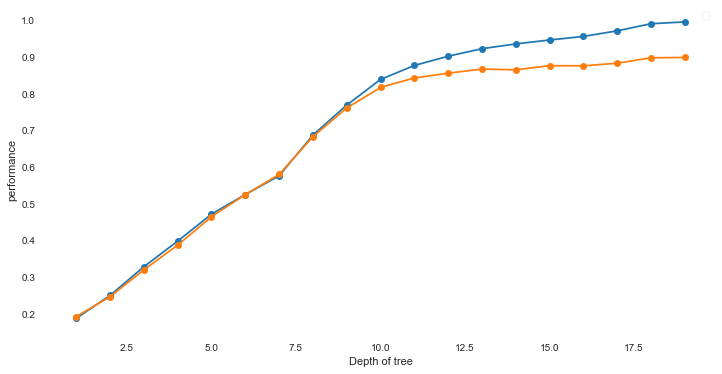

In [128]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [129]:
dt_model = DecisionTreeRegressor(max_depth=19, random_state=10)

In [130]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=19, random_state=10)

In [131]:
y_pred = dt_model.predict(test_x)

In [132]:
#Training score - r_2 
dt_model.score(train_x, train_y) * 100 

99.60608221685496

In [133]:
#Validation score
dt_model.score(test_x, test_y) * 100 

89.92795861061745

In [134]:
mse = mean_squared_error(test_y, y_pred)
rmse = mse ** 0.5 
rmse

5416.561578944489

In [135]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

## Gridsearch for hyperparameter tuning 

In [136]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8, 10, 20],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dt_model, param_grid, cv=5)

grid_cv_dtm.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=19, random_state=10),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 6, 8, 10, 20],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [137]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7068071454488021
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 20, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [138]:
dt_model = DecisionTreeRegressor(max_depth=19, max_leaf_nodes= 100, min_samples_leaf= 20,min_samples_split= 10, random_state=10)

In [139]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=19, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10, random_state=10)

In [140]:
y_pred = dt_model.predict(test_x)

In [141]:
#Training score - 
dt_model.score(train_x, train_y) * 100 

76.11812347329513

In [142]:
#Validation score
dt_model.score(test_x, test_y) * 100 

75.3751326291796

In [143]:
mse = mean_squared_error(test_y, y_pred)
rmse = mse ** 0.5 
rmse

8469.38516762327

In [144]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008571,0.000811,0.001610,0.000500,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.258451,0.235233,0.217864,0.261917,0.256877,0.246069,0.016936,181
1,0.008580,0.001200,0.001394,0.000489,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.258451,0.235233,0.217864,0.261917,0.256877,0.246069,0.016936,181
2,0.007778,0.000403,0.001198,0.000402,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.258451,0.235233,0.217864,0.261917,0.256877,0.246069,0.016936,181
3,0.007373,0.000481,0.001396,0.000488,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.258451,0.235233,0.217864,0.261917,0.256877,0.246069,0.016936,181
4,0.007779,0.000399,0.001197,0.000399,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.258451,0.235233,0.217864,0.261917,0.256877,0.246069,0.016936,181


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

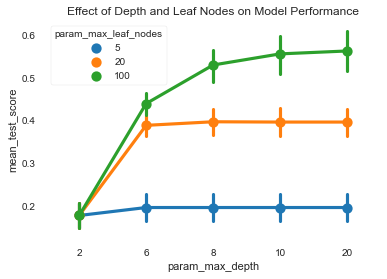

In [145]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

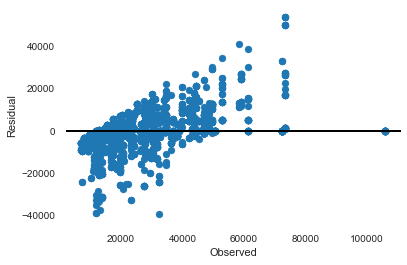

In [146]:
# Evaluating training model
predicted = grid_cv_dtm.best_estimator_.predict(test_x)
residuals = test_y.values.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(test_y.values.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [147]:
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting parameters tuning
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)


In [148]:
from sklearn.metrics import mean_squared_error
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(test_x)
residuals = test_y.values.flatten() - y_pred


r2_score = best_dtm_model.score(test_x,test_y)* 100
print("R-squared:{:.3f}".format(r2_score) )
print("RMSE: %.2f" % metrics.mean_squared_error(test_y, y_pred)**0.5)

R-squared:75.375
RMSE: 8469.39
